In [103]:
import pandas as pd
import numpy as np
import seaborn as sns

In [83]:
from sklearn.metrics  import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix ;

In [84]:
url = 'https://raw.githubusercontent.com/Muniz97/Yellow-fever-Febre-Amarela/main/3%20-%20Preprocessing/train_base.csv'

In [85]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Muniz97/Yellow-fever-Febre-Amarela/main/3%20-%20Preprocessing/train_base.csv')
df_train.head()

,UF_LPI,MUN_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS,OBITO
0,0.563534,0.375589,0.398870,-1.182366,-0.571812,-0.004675,1.540279,1
1,0.350289,0.239055,0.398870,1.592348,-0.571812,0.491140,0.582164,0
2,0.352941,0.272060,0.259259,0.868510,-0.571812,0.491140,-0.735243,1
3,0.563534,0.326876,0.398870,-0.398208,-0.216773,-2.483752,-0.495715,0
4,0.350427,0.393389,0.259259,0.144671,-0.216773,0.491140,0.103107,1


In [86]:
x_train = df_train[['UF_LPI','MUN_LPI','SEXO','IDADE','MES_IS','ANO_IS','DIA_IS']]
y_train = df_train['OBITO']

In [87]:
url = 'https://raw.githubusercontent.com/Muniz97/Yellow-fever-Febre-Amarela/main/3%20-%20Preprocessing/test_base.csv'
df_test = pd.read_csv(url)
df_test.head()

,UF_LPI,MUN_LPI,SEXO,IDADE,MES_IS,ANO_IS,DIA_IS,OBITO
0,0.350289,0.326876,0.39887,0.989149,-0.216773,0.49114,-0.375950,0
1,0.350289,0.375589,0.39887,0.325631,-0.216773,0.49114,0.701928,0
2,0.352941,0.396635,0.39887,-0.518848,-0.571812,0.49114,1.180986,0
3,0.352941,0.343702,0.39887,0.446270,-0.216773,0.49114,-0.016657,1
4,0.352941,0.272060,0.39887,-0.337888,-0.571812,0.49114,-0.974772,0


In [88]:
x_test = df_test[['UF_LPI','MUN_LPI','SEXO','IDADE','MES_IS','ANO_IS','DIA_IS']]
y_test = df_test['OBITO']

In [ ]:
# Select features

In [101]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

In [102]:
#select_k_best = SelectKBest(chi2, k = 5)

In [ ]:
#select_k_best.fit_transform # Vai dar erro pq tem valores negativos

In [89]:
# Base line

In [90]:
from sklearn.dummy import DummyClassifier

In [91]:
dummy = DummyClassifier();

In [92]:
dummy_stratified = DummyClassifier(strategy= 'stratified', random_state= 1337)

In [93]:
dummy_stratified.fit(x_train,y_train)

DummyClassifier(random_state=1337, strategy='stratified')

In [94]:
dummy_predict = dummy_stratified.predict(x_test) # stratified

<Axes: >

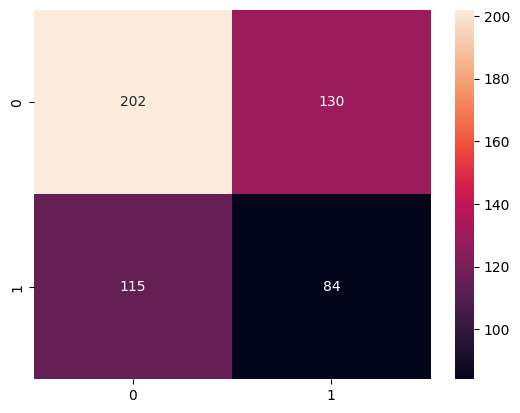

In [109]:
matriz = confusion_matrix(y_test ,dummy_predict)
sns.heatmap(matriz, annot = True, fmt = '.0f')

In [116]:
accuracy = accuracy_score(y_test, dummy_predict)
precision = precision_score(y_test, dummy_predict, zero_division=1)
recall = recall_score(y_test, dummy_predict)
f1 = f1_score(y_test, dummy_predict)

# Imprimir as métricas
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Acurácia: 0.5386064030131826
Precisão: 0.3925233644859813
Recall: 0.4221105527638191
F1-score: 0.4067796610169491


In [ ]:
# Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
model_random = RandomForestClassifier(n_estimators= 100)

In [113]:
model_random.fit(x_train,y_train)

RandomForestClassifier()

In [114]:
random_predict = model_random.predict(x_test)

In [117]:
accuracy = accuracy_score(y_test, random_predict)
precision = precision_score(y_test, random_predict)
recall = recall_score(y_test, random_predict)
f1 = f1_score(y_test, random_predict)

# Imprimir as métricas
print(f'Acurácia: {accuracy}')
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

Acurácia: 0.6516007532956686
Precisão: 0.5432098765432098
Recall: 0.44221105527638194
F1-score: 0.48753462603878117
